In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
r= RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d= DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g = GaussianNB()
b = BernoulliNB()
from xgboost import XGBClassifier
xgbc = XGBClassifier()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df1 = pd.read_csv('ttrain.csv')

In [7]:
df1.shape

(891, 12)

In [8]:
df2= pd.read_csv('ttest.csv')

In [9]:
df2.shape

(418, 11)

In [10]:
df=df1.append(df2)

In [11]:
df.shape

(1309, 12)

In [12]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
847,848,0.0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C
459,460,0.0,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.7500,NaN,Q
110,1002,NaN,2,"Stanton, Mr. Samuel Ward",male,41.0,0,0,237734,15.0458,NaN,C
332,333,0.0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
611,612,0.0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
208,1100,NaN,1,"Rosenbaum, Miss. Edith Louise",female,33.0,0,0,PC 17613,27.7208,A11,C
501,502,0.0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
575,576,0.0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
347,1239,NaN,3,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [14]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [15]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [16]:
df.Embarked.value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [17]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [18]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.',expand=False)
df['Title'].value_counts()
#Yukarıdaki kodal isimlerin başında olan başlıkları ayıkladık

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Jonkheer      1
Lady          1
Capt          1
Mme           1
Dona          1
Countess      1
Don           1
Sir           1
Name: Title, dtype: int64

In [19]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')
df['Title'] = df['Title'].replace(['Ms','Mile'],'Miss')
df['Title'] = df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title'] = df['Title'].replace(['Dr','Major','Col','Sir','Rev','Jonkheer','Capt','Don'],'Mr')

In [20]:
df['Senior'] = df['Age'].map(lambda s:1 if s>70 else 0)

In [21]:
df.groupby('Sex')["Age"].mean()
#Cinsiyetlerin yaş ortalaması

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Senior
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.004584
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.067573
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [23]:
 df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
Senior            0
dtype: int64

In [24]:
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"),inplace=True)
df.groupby("Title")["Age"].transform("median")

#  Her ünvanın kendi yaş ortalamasın bulup onunla boş
# olan yerleri dolduruyoruz

0      30.0
1      35.5
2      22.0
3      35.5
4      30.0
       ... 
413    30.0
414    35.5
415    30.0
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
 13  Senior       1309 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


In [26]:
del df['Cabin']
# Çok azı dolu olduğu için 
# diğer değerleri siliyoruz

In [27]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
# Fare de bir adet boşluk var onu dolduruyoruz

In [28]:
df['Family'] = df['SibSp'] +df['Parch'] +1
# Family sütunu Böylelikle aile saysını oluşturuyoruz

<AxesSubplot:>

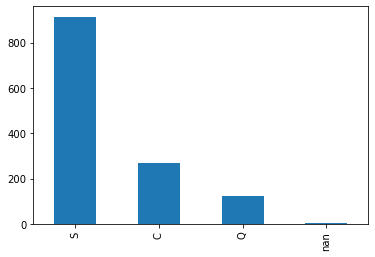

In [29]:
df.Embarked.value_counts(dropna=False).plot(kind='bar')

In [30]:
df['Embarked'] = df['Embarked'].fillna('S')
# fillna() boşlukları doldur demek

<AxesSubplot:>

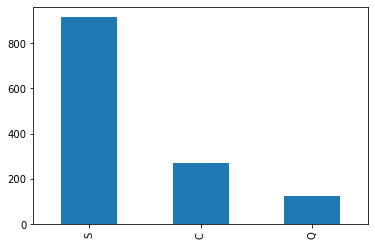

In [31]:
df.Embarked.value_counts(dropna=False).plot(kind='bar')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

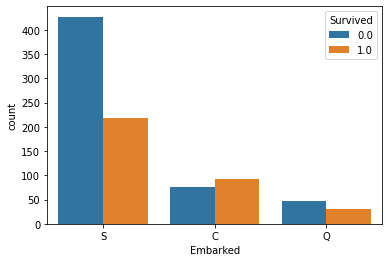

In [32]:
sns.countplot(x="Embarked",hue="Survived",data=df)
# Binilen yere göre hayatta kalanların oranı hesaplanıyor

<AxesSubplot:ylabel='Frequency'>

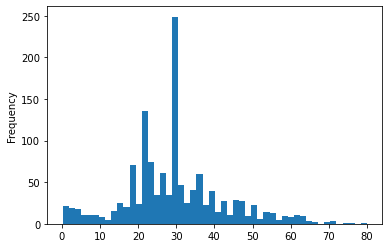

In [33]:
df.Age.plot(kind='hist',bins=50)

In [34]:
df.Family.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

In [35]:
df['Single'] = df.Family<2
df['Small']=(df.Family>1) & (df.Family<5)
df['Medium']=(df.Family>4) & (df.Family<7)
df['Large']=(df.Family>6)
# Aileleri sınıflara ayırıyoruz 
# büyük orta küçük gibi

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
 11  Title        1309 non-null   object 
 12  Senior       1309 non-null   int64  
 13  Family       1309 non-null   int64  
 14  Single       1309 non-null   bool   
 15  Small        1309 non-null   bool   
 16  Medium       1309 non-null   bool   
 17  Large        1309 non-null   bool   
dtypes: bool(4), float64(3), int64(6), object(5)
memor

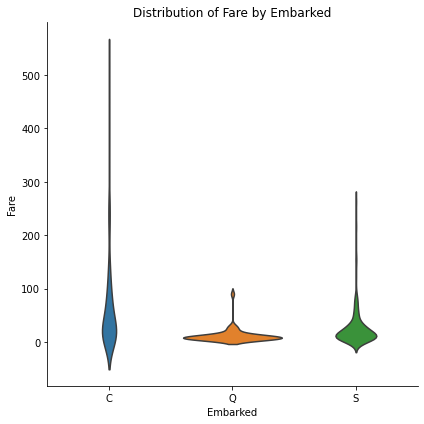

In [37]:
sns.catplot(x="Embarked",y="Fare",kind="violin",inner=None,data=df,height=6,order=['C','Q','S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

In [38]:
del df['Name']

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
 10  Title        1309 non-null   object 
 11  Senior       1309 non-null   int64  
 12  Family       1309 non-null   int64  
 13  Single       1309 non-null   bool   
 14  Small        1309 non-null   bool   
 15  Medium       1309 non-null   bool   
 16  Large        1309 non-null   bool   
dtypes: bool(4), float64(3), int64(6), object(4)
memory usage: 188.3+ KB


In [40]:
df.drop(['PassengerId','Ticket'],axis=1,inplace=True)
# Bilet numarasının ibze bir yardım olacağın düşünmediğimiz için siliyoruz

In [41]:
df_dummies=pd.get_dummies(df,drop_first=True)
# yazı ile eşit olan şeyleri yazıya çeviriyoruz

In [42]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Age         1309 non-null   float64
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   Fare        1309 non-null   float64
 6   Senior      1309 non-null   int64  
 7   Family      1309 non-null   int64  
 8   Single      1309 non-null   bool   
 9   Small       1309 non-null   bool   
 10  Medium      1309 non-null   bool   
 11  Large       1309 non-null   bool   
 12  Sex_male    1309 non-null   uint8  
 13  Embarked_Q  1309 non-null   uint8  
 14  Embarked_S  1309 non-null   uint8  
 15  Title_Miss  1309 non-null   uint8  
 16  Title_Mlle  1309 non-null   uint8  
 17  Title_Mr    1309 non-null   uint8  
 18  Title_Mrs   1309 non-null   uint8  
dtypes: bool(4), float64(3), int6

In [43]:
df_train = df_dummies[:891]
df_test = df_dummies[891:]
# ilk başta verileri birleştirmeden önce ilk 891 
# tanesini train için 891 den sonrasıda test içindi

In [44]:
df_train.shape,df_test.shape

((891, 19), (418, 19))

In [45]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,0,2,False,True,False,False,1,0,1,0,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,2,False,True,False,False,0,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,1,True,False,False,False,0,0,1,1,0,0,0
3,1.0,1,35.0,1,0,53.1000,0,2,False,True,False,False,0,0,1,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,True,False,False,False,1,0,1,0,0,1,0


In [46]:
del df_train["Survived"]

In [47]:
y=df1["Survived"]

In [64]:
df1.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None, (1309, 15))

In [68]:
algorithms = [g,b,k,log,gbc,r,d,xgbc]
names =['GaussianNB','BernoulliNB','KNeighborsClassifier','LogisticRegression','GradientBoostingClassifier','RandomForestClassifier','DecisionTreeClassifier','XGBClassifier']

In [71]:
def algo_test(X,y,algorithms=algorithms,names=names):
        #fit the data
        for i in range(len(algorithms)):
            algorithms[i] = algorithms[i].fit(X,y)
            
        accuracy = []
        precision = []
        recall = []
        f1=[]
        
        for i in range(len(algorithms)):
            accuracy.append(accuracy_score(y,algorithms[i].predict(X)))
            precision.append(precision_score(y,algorithms[i].predict(X)))
            recall.append(recall_score(y,algorithms[i].predict(X)))
            f1.append(f1_score(y,algorithms[i].predict(X)))

        
        metrics = pd.DataFrame(columns =['Accuracy','Precision','Recall','F1'],index=names)
        metrics['Accuracy']=accuracy
        metrics['Precision'] = precision
        metrics['Recall'] = recall
        metrics['F1']=f1
        return metrics.sort_values('F1',ascending=False)
    
    

In [72]:
algo_test(df_train,y)

C:\Users\muzaf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\muzaf\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:22:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,Precision,Recall,F1
RandomForestClassifier,0.979798,0.987952,0.959064,0.973294
DecisionTreeClassifier,0.979798,0.993902,0.953216,0.973134
XGBClassifier,0.961841,0.966667,0.932749,0.949405
GradientBoostingClassifier,0.893378,0.899676,0.812865,0.854071
LogisticRegression,0.829405,0.800633,0.739766,0.768997
KNeighborsClassifier,0.818182,0.788462,0.719298,0.752294
BernoulliNB,0.810325,0.758209,0.742690,0.750369
GaussianNB,0.804714,0.781879,0.681287,0.728125


In [73]:
df_test.shape

(418, 19)

In [74]:
df_test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,0,1,True,False,False,False,1,1,0,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,0,2,False,True,False,False,0,0,1,0,0,0,1
2,NaN,2,62.0,0,0,9.6875,0,1,True,False,False,False,1,1,0,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,0,1,True,False,False,False,1,0,1,0,0,1,0
4,NaN,3,22.0,1,1,12.2875,0,3,False,True,False,False,0,0,1,0,0,0,1


In [76]:
del df_test["Survived"]

KeyError: 'Survived'

In [77]:
tahmin = d.predict(df_test)

In [78]:
tahmin

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [79]:
#df_test["Survived"] = tahmin

In [80]:
df_test.head(418)

,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,0,1,True,False,False,False,1,1,0,0,0,1,0
1,3,47.0,1,0,7.0000,0,2,False,True,False,False,0,0,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,True,False,False,False,1,1,0,0,0,1,0
3,3,27.0,0,0,8.6625,0,1,True,False,False,False,1,0,1,0,0,1,0
4,3,22.0,1,1,12.2875,0,3,False,True,False,False,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,8.0500,0,1,True,False,False,False,1,0,1,0,0,1,0
414,1,39.0,0,0,108.9000,0,1,True,False,False,False,0,0,0,0,0,0,1
415,3,38.5,0,0,7.2500,0,1,True,False,False,False,1,0,1,0,0,1,0
416,3,30.0,0,0,8.0500,0,1,True,False,False,False,1,0,1,0,0,1,0


In [81]:
sonuc=df2[["PassengerId"]]

In [82]:
sonuc["Survived"] =tahmin

<ipython-input-82-145670e9c0c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"] =tahmin


In [83]:
sonuc.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1


In [84]:
sonuc.shape

(418, 2)

In [85]:
sonuc.to_csv("reuslt.csv",index=False)

In [86]:
model= d.fit(df_train,y)

In [87]:
tahmin2=model.predict(df_test)

In [88]:
sonuc2=df2[["PassengerId"]]

In [89]:
sonuc2["Survived"]=tahmin2

<ipython-input-89-5649a780518e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc2["Survived"]=tahmin2


In [90]:
sonuc.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1
